# Video: Using Subplots with Pandas

This video gives some tips for plotting pandas data with subplots.

In [ ]:
import matplotlib.pyplot as plt
import pandas

In [ ]:
abalone = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx602-examples/main/data/abalone.tsv", sep="\t")
abalone

## Pandas vs Subplots

* Pandas is inconsistent with subplots.
  * Sometimes it just works.
  * Sometimes you need to tell it explicitly.


Script:
* We previously used pandas to plot charts within subplots, but it took some fiddling around.
* I will review how we did that before, and then give you a couple other options to consider.

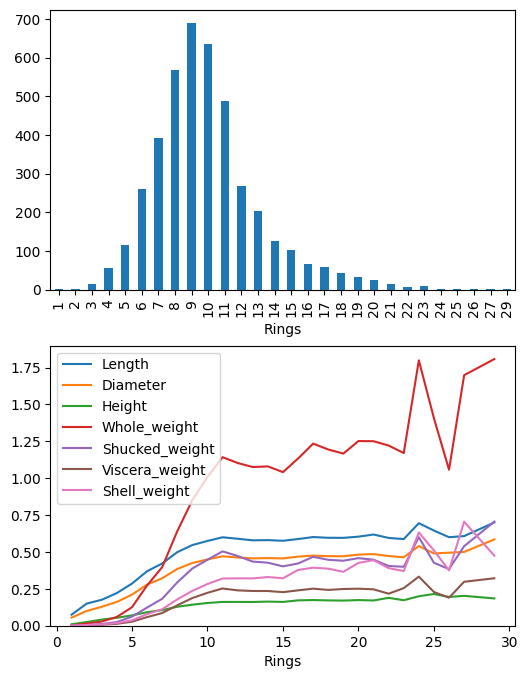

In [ ]:
plt.figure(figsize=(6, 8))
plt.subplot(2, 1, 1)
abalone.groupby("Rings").size().plot(kind="bar")
plt.subplot(2, 1, 2)
ax2 = abalone.groupby("Rings").mean(numeric_only=True).plot(ax=plt.gca())
ax2.set_ylim(0)
None

Script:
* These charts are from the previous video about line and bar charts.
* SCROLL UP TO CODE
* The first pandas chart went in the first subplot without any problems.
* The second one did not.
* For the second one, I used the `ax` argument of the plot method to tell it where the second chart should be.
* HIGHLIGHT AX USAGE
* To get the axis object, I used the function `gca`, get current axis, to get the axis object for the current subplot.
* In other circumstances, you might use axis objects returned by other plot functions.
* The subplot function also returns an axis object which gives us our next option.


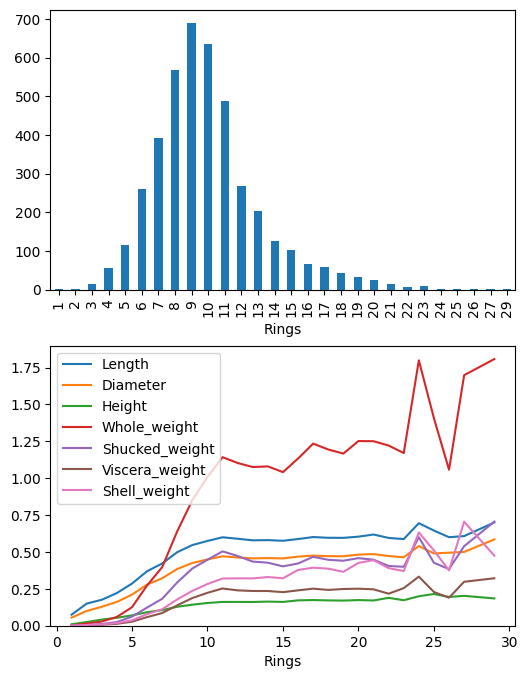

In [ ]:
plt.figure(figsize=(6, 8))
abalone.groupby("Rings").size().plot(kind="bar", ax=plt.subplot(2, 1, 1))
ax2 = abalone.groupby("Rings").mean(numeric_only=True).plot(ax=plt.subplot(2, 1, 2))
ax2.set_ylim(0)
None

Script:
* For this version, I moved the subplot calls into the plot lines.
* HIGHLIGHT AX ARGUMENTS
* This reduces the number of lines of code, but makes the lines longer and a smidgeon harder to read.
* It also breaks the Matplotlib pattern of calling subplot and then calling plot functions, so it may be surprising to other people reading your code.
* I am hesitant to recommend this version.
* The final version that I will show you uses built-in subplot support.

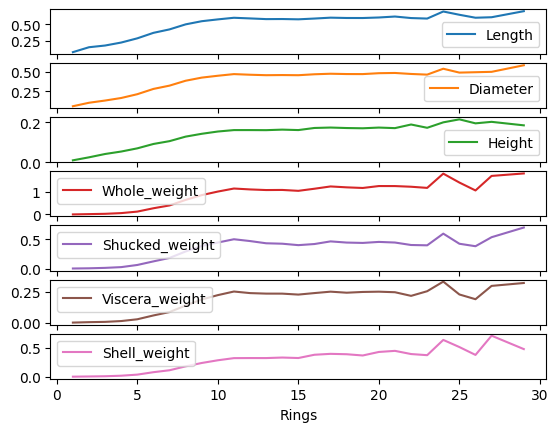

In [ ]:
_ = abalone.groupby("Rings").mean(numeric_only=True).plot(subplots=True)

Script:
* In this version, I took a previous plot call and added the `subplots=True` argument.
* This made a separate subplot for each column plotted, instead of combining them into one chart.
* This let each column have its own range which avoids some of the previous problems.
* This plot call also only used one set of x-axis labels at the bottom, instead of squeezing them between each pair of subplots.
* This is nice since they all share the same x range, so this frees up space for charts instead.
* This is a good version if it matches up with what you want to show.